In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import os
path = "/cluster/home/mlindner/Github/master_thesis_project/src/data/outputs"
plots_path = "/cluster/home/mlindner/Github/master_thesis_project/src/data/outputs/plots/by_game"
os.makedirs(plots_path, exist_ok=True)

In [3]:
df

,model_provider_1,model_name_1,model_provider_2,model_name_2,personality_1,personality_2,agent_1_scores,agent_2_scores,agent_1_messages,agent_2_messages,agent_1_actions,agent_2_actions,total_rounds,total_tokens,total_cost_USD,GameName,GameID,agent_1_cumulative_scores,agent_2_cumulative_scores


In [ ]:
file_name = "250331.csv"
df = pd.read_csv(os.path.join(path, file_name))

df['agent_1_cumulative_scores'] = df['agent_1_scores'].apply(lambda x: [0] + list(pd.Series(x).cumsum()))
df['agent_2_cumulative_scores'] = df['agent_2_scores'].apply(lambda x: [0] + list(pd.Series(x).cumsum()))

#parse as lists, something went wrong when saving the csv
df['truthful_agent_1'] = df['truthful_agent_1'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['truthful_agent_2'] = df['truthful_agent_2'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# Parse the actions as lists of strings
df['agent_1_actions'] = df['agent_1_actions'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['agent_2_actions'] = df['agent_2_actions'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['agent_1_messages'] = df['agent_1_messages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['agent_2_messages'] = df['agent_2_messages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['intent_agent_1'] = df['intent_agent_1'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['intent_agent_2'] = df['intent_agent_2'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['game_name'] = df['game_name'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df = df.rename(columns={'game_name': 'GameName'})

# Create a new DataFrame with one row per agent
df_agent1 = df.copy()
df_agent2 = df.copy()

# Add a column to indicate the agent
df_agent1['Agent'] = 'Agent 1'
df_agent2['Agent'] = 'Agent 2'
# Rename columns to remove agent-specific prefixes
df_agent1 = df_agent1.rename(columns={
    'personality_1': 'Personality',
    'agent_1_scores': 'Scores',
    'agent_1_messages': 'Messages',
    'agent_1_actions': 'Actions',
    'agent_1_cumulative_scores': 'CumulativeScores',
    'intent_agent_1': 'Intent',
    'truthful_agent_1': 'Truthful',
    'analysis_agent_1': 'Analysis'
})

df_agent2 = df_agent2.rename(columns={
    'personality_2': 'Personality',
    'agent_2_scores': 'Scores',
    'agent_2_messages': 'Messages',
    'agent_2_actions': 'Actions',
    'agent_2_cumulative_scores': 'CumulativeScores',
    'intent_agent_2': 'Intent',
    'truthful_agent_2': 'Truthful',
    'analysis_agent_2': 'Analysis'
})

# Remove the other columns
df_agent1 = df_agent1.drop(columns=[
    'personality_2', 'agent_2_scores', 'agent_2_messages', 'agent_2_actions', 
    'agent_2_cumulative_scores', 'intent_agent_2', 'truthful_agent_2', 'analysis_agent_2'
])
df_agent2 = df_agent2.drop(columns=[
    'personality_1', 'agent_1_scores', 'agent_1_messages', 'agent_1_actions', 
    'agent_1_cumulative_scores', 'intent_agent_1', 'truthful_agent_1', 'analysis_agent_1'
])

# Combine the two DataFrames
df_agents = pd.concat([df_agent1, df_agent2], ignore_index=True)

nonmbti = ['NONE', 'ALTRUISTIC', 'SELFISH']
# Map each personality to its dichotomies
df_agents['I/E'] = df_agents['Personality'].apply(lambda x: 'I' if x[0] == 'I' else 'E' if x not in nonmbti else None)
df_agents['N/S'] = df_agents['Personality'].apply(lambda x: 'N' if x[1] == 'N' else 'S' if x not in nonmbti else None)
df_agents['T/F'] = df_agents['Personality'].apply(lambda x: 'T' if x[2] == 'T' else 'F' if x not in nonmbti else None)
df_agents['J/P'] = df_agents['Personality'].apply(lambda x: 'J' if x[3] == 'J' else 'P' if x not in nonmbti else None)
df_agents
#df_agents.to_csv("/cluster/home/mlindner/Github/master_thesis_project/src/data/outputs/plots/stability_PD/stability_PD.csv", index=False)

KeyError: 'truthful_agent_1'

In [22]:
df_agents["TotalScore"] = df_agents["CumulativeScores"].apply(lambda x: x[-1])
df_agents["Truthfullness"] = df_agents["Truthful"].apply(lambda x: sum(x)/len(x) if len(x) > 0 else 0)

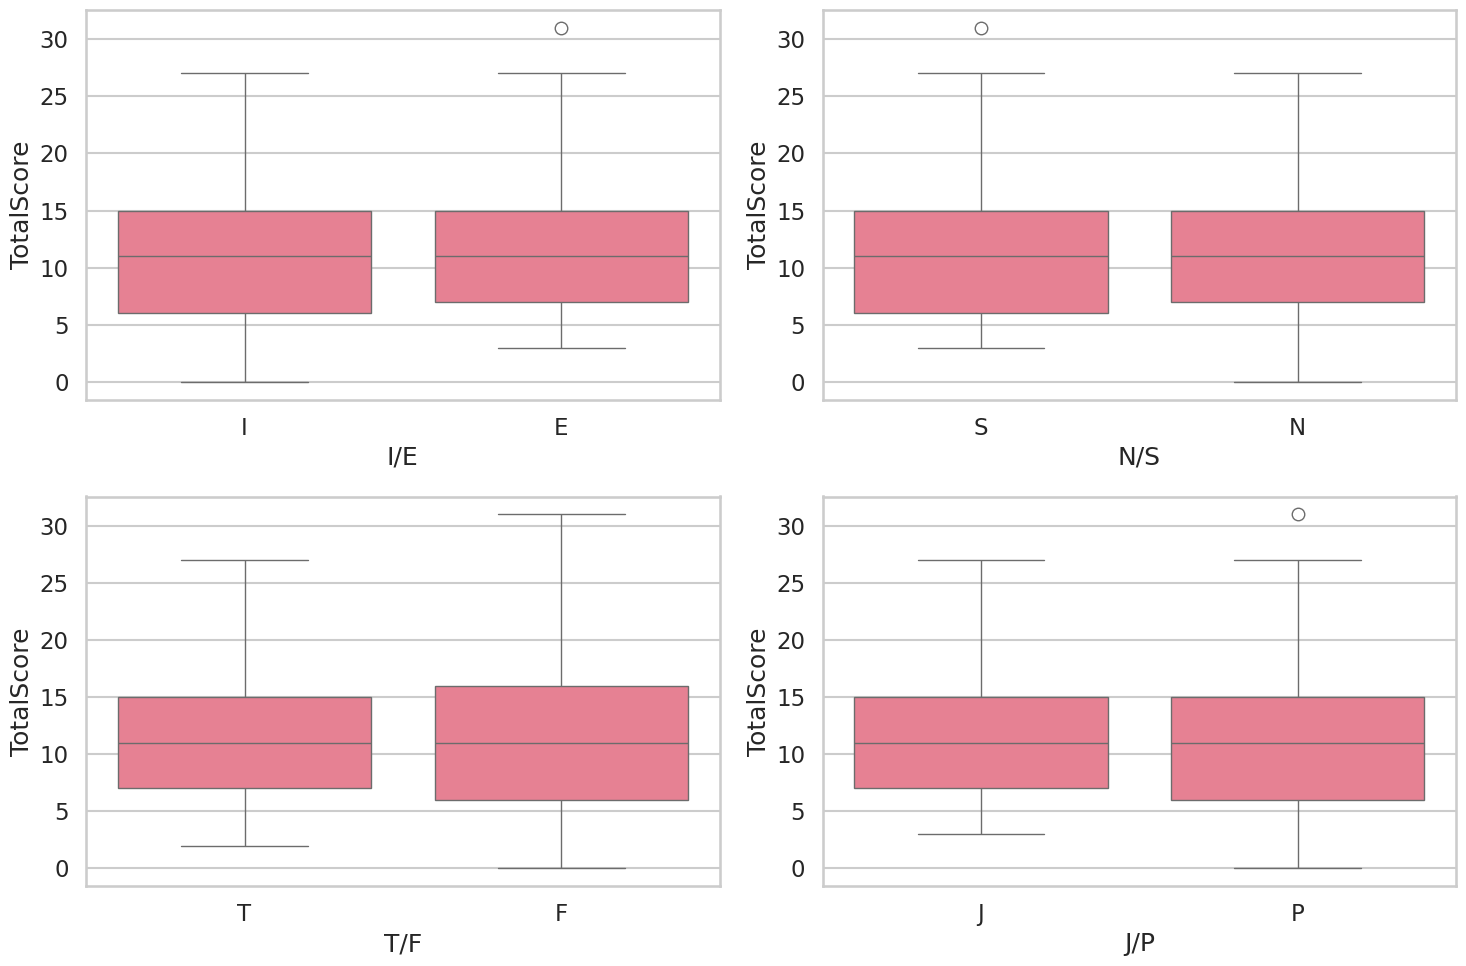

In [32]:
#plot score on y-axis and row on x-axis for individual dichotomies
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("husl")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x='I/E', y='TotalScore', data=df_agents, ax=axs[0, 0])
sns.boxplot(x='N/S', y='TotalScore', data=df_agents, ax=axs[0, 1])
sns.boxplot(x='T/F', y='TotalScore', data=df_agents, ax=axs[1, 0])
sns.boxplot(x='J/P', y='TotalScore', data=df_agents, ax=axs[1, 1])
plt.tight_layout()
plt.savefig(plots_path + "score_per_dichotomy.png")
plt.show()

In [ ]:
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("husl")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.violinplot(x='I/E', y='TotalScore', data=df_agents, ax=axs[0, 0])
sns.violinplot(x='N/S', y='TotalScore', data=df_agents, ax=axs[0, 1])
sns.violinplot(x='T/F', y='TotalScore', data=df_agents, ax=axs[1, 0])
sns.violinplot(x='J/P', y='TotalScore', data=df_agents, ax=axs[1, 1])
plt.tight_layout()
plt.savefig(plots_path + "score_violin_per_dichotomy.png")
plt.show()

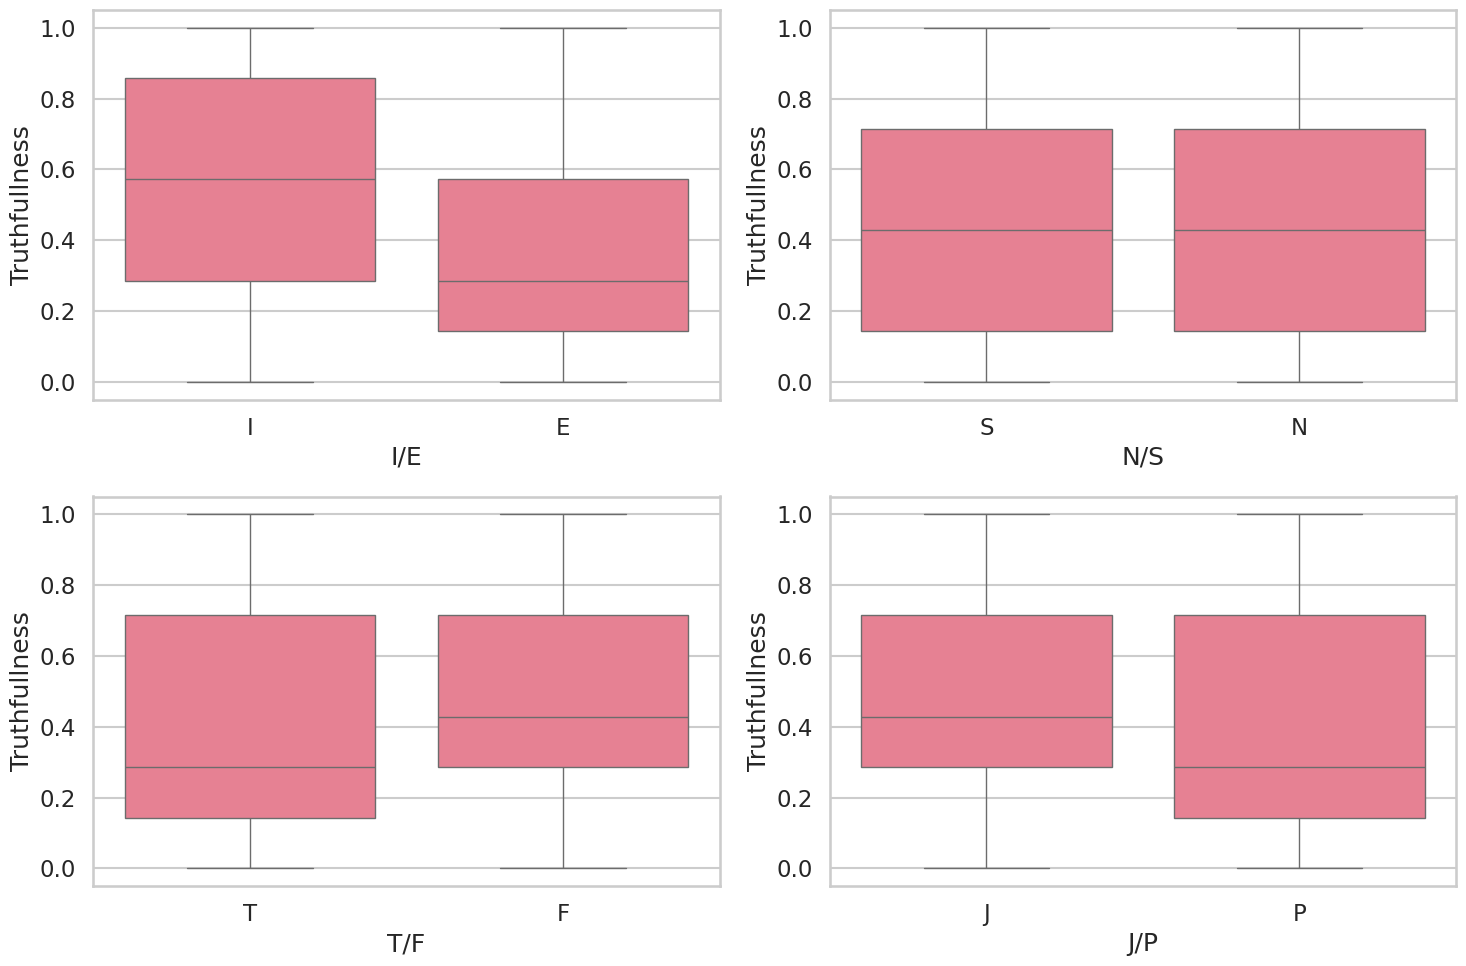

In [33]:
#plot score on y-axis and row on x-axis for individual dichotomies
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("husl")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x='I/E', y='Truthfullness', data=df_agents, ax=axs[0, 0])
sns.boxplot(x='N/S', y='Truthfullness', data=df_agents, ax=axs[0, 1])
sns.boxplot(x='T/F', y='Truthfullness', data=df_agents, ax=axs[1, 0])
sns.boxplot(x='J/P', y='Truthfullness', data=df_agents, ax=axs[1, 1])
plt.tight_layout()
plt.savefig(plots_path + "truthfullness_per_dichotomy.png")
plt.show()

In [ ]:
# Create violin plots for Truthfullness across individual dichotomies
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("husl")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.violinplot(x='I/E', y='Truthfullness', data=df_agents, ax=axs[0, 0])
sns.violinplot(x='N/S', y='Truthfullness', data=df_agents, ax=axs[0, 1])
sns.violinplot(x='T/F', y='Truthfullness', data=df_agents, ax=axs[1, 0])
sns.violinplot(x='J/P', y='Truthfullness', data=df_agents, ax=axs[1, 1])
plt.tight_layout()
plt.savefig(plots_path + "truthfullness_violin_per_dichotomy.png")
plt.show()

In [ ]:
# Create violin plots for Truthfullness across individual dichotomies, grouped by GameName
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("husl")
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
sns.violinplot(x='I/E', y='Truthfullness', hue='GameName', data=df_agents, split=True, ax=axs[0, 0])
sns.violinplot(x='N/S', y='Truthfullness', hue='GameName', data=df_agents, split=True, ax=axs[0, 1])
sns.violinplot(x='T/F', y='Truthfullness', hue='GameName', data=df_agents, split=True, ax=axs[1, 0])
sns.violinplot(x='J/P', y='Truthfullness', hue='GameName', data=df_agents, split=True, ax=axs[1, 1])
plt.tight_layout()
plt.savefig(plots_path + "truthfullness_violin_per_game_dichotomy.png")
plt.show()

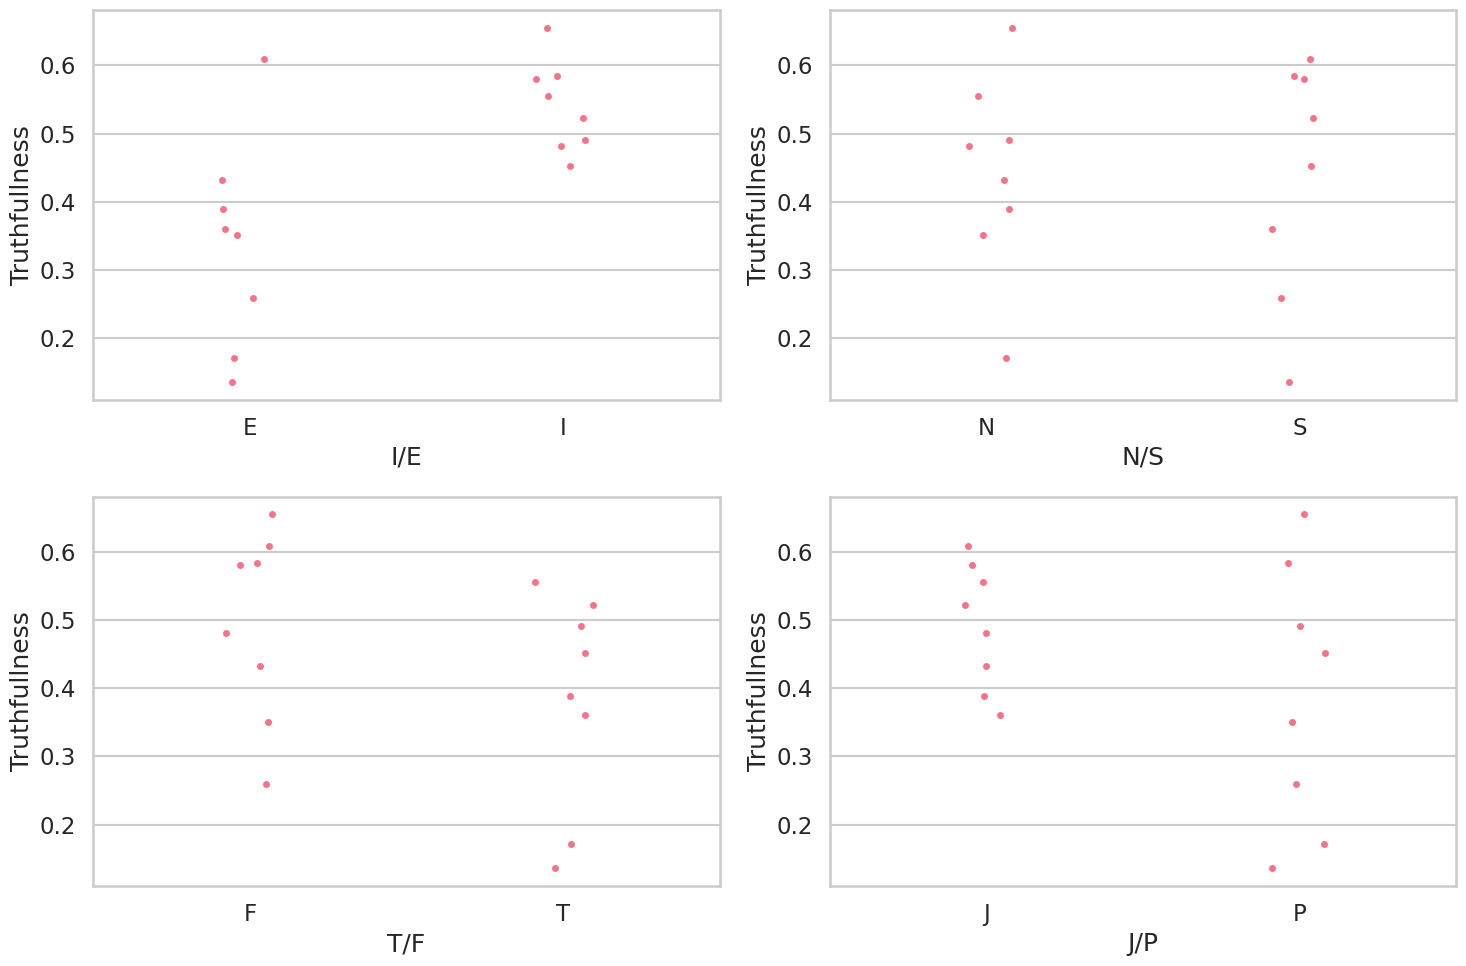

In [ ]:
#plot score on y-axis and row on x-axis for individual dichotomies

#df_grouped_game = df_agents.groupby(['GameName', 'I/E', 'N/S', 'T/F', 'J/P'])["Truthfullness"].mean().reset_index()
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("husl")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.stripplot(x='I/E', y='Truthfullness',hue='GameName' data=df_agents, ax=axs[0, 0], jitter=True)
sns.stripplot(x='N/S', y='Truthfullness',hue='GameName' data=df_agents, ax=axs[0, 1], jitter=True)
sns.stripplot(x='T/F', y='Truthfullness',hue='GameName' data=df_agents, ax=axs[1, 0], jitter=True)
sns.stripplot(x='J/P', y='Truthfullness',hue='GameName' data=df_agents, ax=axs[1, 1], jitter=True)
plt.tight_layout()
plt.savefig(plots_path + 'truthfullness_stripplot_dichotomies.png')
plt.show()

